In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
df = pd.read_csv("dataset/SIRTUIN6.csv")
df

,SC-5,SP-6,SHBd,minHaaCH,maxwHBa,FMF,Class
0,0.540936,7.64192,0.162171,0.445270,2.205570,0.467742,High_BFE
1,0.815332,6.59011,0.000000,0.497445,2.003140,0.415385,High_BFE
2,0.734399,6.85522,0.000000,0.507748,1.885900,0.400000,High_BFE
3,0.624557,7.00949,0.450300,0.483648,2.027570,0.500000,High_BFE
4,0.460290,4.92643,0.448998,0.482293,2.064380,0.536585,High_BFE
...,...,...,...,...,...,...,...
95,0.083333,3.50569,0.000000,0.438522,2.221560,0.307692,Low_BFE
96,0.707068,4.58381,0.000000,0.000000,0.011251,0.153846,Low_BFE
97,0.216506,3.09490,0.000000,0.000000,0.000000,0.326531,Low_BFE
98,0.271018,2.39997,0.000000,0.356727,2.346090,0.342105,Low_BFE


In [3]:
class_dist = df.groupby("Class").size()

for index, val in class_dist.iteritems():
    percentage = (val / sum(class_dist) * 100)
    print(f"Class {index} : {val} samples ({percentage:.2f}%)")

Class High_BFE : 50 samples (50.00%)
Class Low_BFE : 50 samples (50.00%)


In [4]:
encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df["Class"])

In [5]:
df.describe()

,SC-5,SP-6,SHBd,minHaaCH,maxwHBa,FMF,Class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.420488,4.429250,0.356504,0.443628,1.919511,0.376232,0.500000
std,0.195124,1.403348,0.339313,0.138964,0.522992,0.072255,0.502519
min,0.083333,2.091810,0.000000,0.000000,0.000000,0.153846,0.000000
25%,0.282118,3.345093,0.000000,0.429809,1.839850,0.326531,0.000000
50%,0.393350,4.107115,0.373387,0.467655,2.020210,0.376024,0.500000
75%,0.532954,5.302952,0.482501,0.505934,2.161543,0.423240,1.000000
max,0.918546,7.641920,1.465000,0.720723,3.778650,0.536585,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

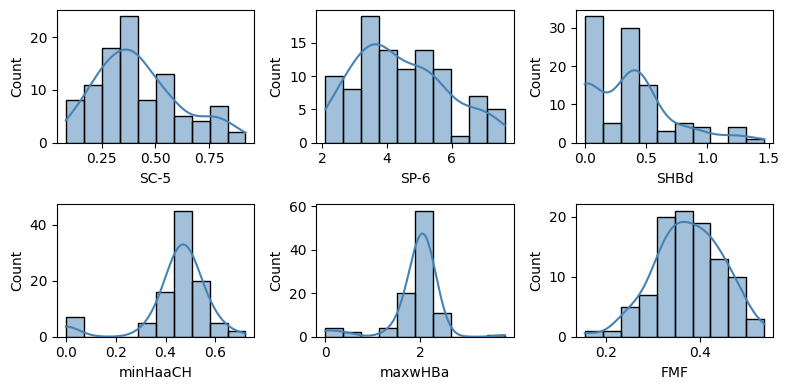

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

features = list(df.columns)

for i in range(2):
    for j in range(3):
        feat = features[i*3 + j]
        if feat == 'Class':
            break
        sns.histplot(ax=axes[i, j], data=df, x=feat, bins=10, kde=True, color='steelblue')
        
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

In [9]:
df.corr()["Class"].sort_values(ascending=False)

Class       1.000000
SHBd        0.006654
maxwHBa    -0.149368
minHaaCH   -0.268568
SC-5       -0.371513
FMF        -0.608034
SP-6       -0.676380
Name: Class, dtype: float64

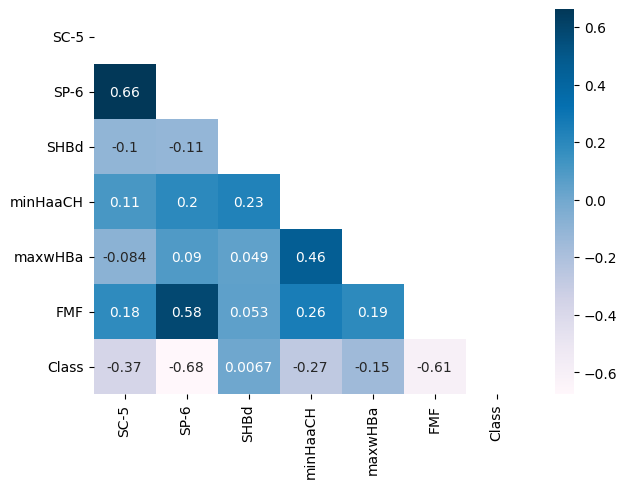

In [10]:
correlation = df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(7,5))
ax_ = sns.heatmap(correlation, cmap="PuBu", annot=True, annot_kws={"size":10}, mask=mask)

ax_.tick_params(axis='both', which='major', labelsize=10)

In [12]:
df.corr()

,SC-5,SP-6,SHBd,minHaaCH,maxwHBa,FMF,Class
SC-5,1.000000,0.662082,-0.101657,0.110145,-0.083664,0.181699,-0.371513
SP-6,0.662082,1.000000,-0.113093,0.195699,0.089528,0.579867,-0.676380
SHBd,-0.101657,-0.113093,1.000000,0.232591,0.049229,0.052574,0.006654
minHaaCH,0.110145,0.195699,0.232591,1.000000,0.460770,0.258250,-0.268568
maxwHBa,-0.083664,0.089528,0.049229,0.460770,1.000000,0.189825,-0.149368
FMF,0.181699,0.579867,0.052574,0.258250,0.189825,1.000000,-0.608034
Class,-0.371513,-0.676380,0.006654,-0.268568,-0.149368,-0.608034,1.000000


In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [34]:
from sklearn.decomposition import PCA 
import seaborn as sns

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X)
X_train_pca = pd.DataFrame(X_train_pca, columns = ["PC-1", "PC-2"])
yy = pd.DataFrame(y)

y_train_pca = pd.DataFrame(df, columns=["Class"]).merge(X_train_pca, how="inner", left_index=True, right_index=True)

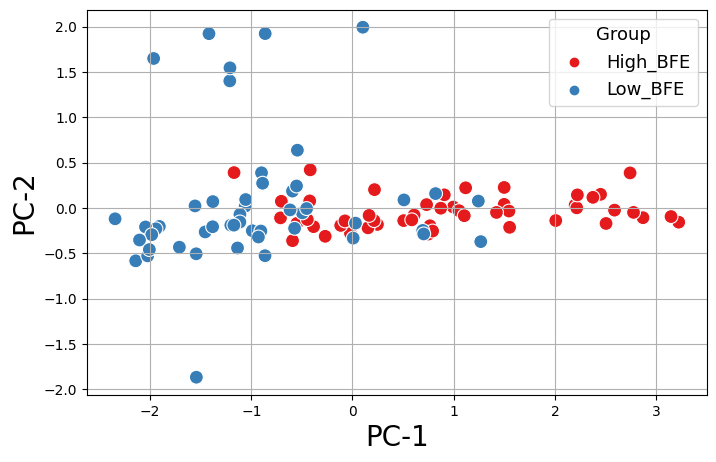

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
scatter = sns.scatterplot(x="PC-1", y="PC-2", data=y_train_pca, s=100, hue="Class", palette="Set1", ax=ax)
ax.legend(loc='upper right')
scatter.set_xlabel("PC-1", fontsize=20)
scatter.set_ylabel("PC-2", fontsize=20)
scatter.grid()
leg = plt.legend(fontsize=13)
leg.set_title("Group", prop={'size': 13})
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
print(f"Intercept: {clf.intercept_[0]:.2f}\n")
print("Model Coefficient:")
for x in range(len(clf.coef_[0])):
    print(f"    {X.columns[x]} : {clf.coef_[0][x]:.2f}")

Intercept: 0.10

Model Coefficient:
    SC-5 : -0.22
    SP-6 : -1.41
    SHBd : 0.13
    minHaaCH : -0.51
    maxwHBa : -0.04
    FMF : -0.93


In [20]:
equation = f"logit(p) = {clf.intercept_[0]:.2f}"

for i, coeff in enumerate(clf.coef_[0]):
    if coeff >= 0:
        equation += f" + {coeff:.2f}x{i+1}"
    else:
        equation += f" - {abs(coeff):.2f}x{i+1}"

print(equation)

logit(p) = 0.10 - 0.22x1 - 1.41x2 + 0.13x3 - 0.51x4 - 0.04x5 - 0.93x6


In [21]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_train, y_train_pred, digits=4))
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0     0.8333    0.7895    0.8108        38
           1     0.8182    0.8571    0.8372        42

    accuracy                         0.8250        80
   macro avg     0.8258    0.8233    0.8240        80
weighted avg     0.8254    0.8250    0.8247        80

[[30  8]
 [ 6 36]]


In [23]:
print(classification_report(y_test, y_test_pred, digits=4))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0     0.8889    0.6667    0.7619        12
           1     0.6364    0.8750    0.7368         8

    accuracy                         0.7500        20
   macro avg     0.7626    0.7708    0.7494        20
weighted avg     0.7879    0.7500    0.7519        20

[[8 4]
 [1 7]]


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

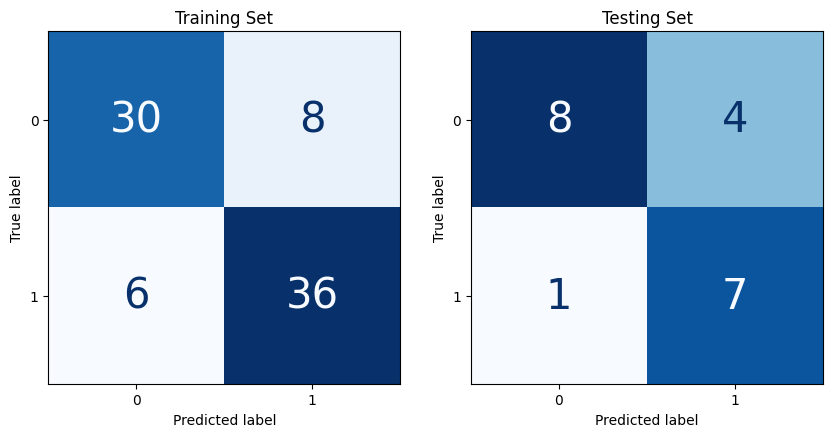

In [25]:
conf_matrix_1 = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))
conf_matrix_2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

conf_matrix_1.plot(ax=axs[0], colorbar=False, cmap="Blues")
conf_matrix_2.plot(ax=axs[1], colorbar=False, cmap="Blues")
axs[0].set_title('Training Set')
axs[1].set_title('Testing Set')
for labels in conf_matrix_1.text_.ravel():
    labels.set_fontsize(30)
for labels in conf_matrix_2.text_.ravel():
    labels.set_fontsize(30)
plt.show()